<a href="https://colab.research.google.com/github/shubhamshuklaa/deep_learning/blob/main/churnmodelling(ANN_USING_WEIGHT_INIT_TRICK).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CREATING ARTIFICIAL NEURAL NETWORK USING WEIGHT INITIALIZATION TRICK

In [12]:
#DATA PREPROCESSING
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [13]:
#IMPORTING THE DATASET
dataset=pd.read_csv('Churn_Modelling.csv')
#creating independent and dependent features
X=dataset.iloc[:, 3:13]
Y=dataset.iloc[:, 13]

In [14]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [16]:
#create dummy variables
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

#concatenating the data frames
X=pd.concat([X,geography,gender],axis=1)

In [17]:
#dropping unneccessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [18]:
#splitting the dataset intobthe training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [19]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train-sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [20]:
#Now lets make ANN
#importing keras libraries and packages
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


In [69]:
#intialising the ANN
classifier=Sequential()
#adding the input layer and 1st hidden layer
classifier.add(Dense(units=10,kernel_initializer='he_normal',activation='relu',input_dim=11))
classifier.add(Dropout(0.3))
#adding the 2nd hidden layer
classifier.add(Dense(units=20,kernel_initializer='he_normal',activation='relu'))
classifier.add(Dropout(0.4))
#adding the 3rd hidden layer
classifier.add(Dense(units=15,kernel_initializer='he_normal',activation='relu'))
classifier.add(Dropout(0.2))
#adding the output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [70]:
classifier.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 10)                120       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_23 (Dense)            (None, 20)                220       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_24 (Dense)            (None, 15)                315       
                                                                 
 dropout_2 (Dropout)         (None, 15)                0         
                                                                 
 dense_25 (Dense)            (None, 1)                

In [71]:
#compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [72]:
#fitting the ANN to the training set
model_history=classifier.fit(X_train, Y_train, validation_split=0.33, batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 3s 4ms/step - loss: 2004.3029 - accuracy: 0.6583 - val_loss: 100.2874 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 3ms/step - loss: 303.6279 - accuracy: 0.6859 - val_loss: 8.8452 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 110.9994 - accuracy: 0.6878 - val_loss: 1.4307 - val_accuracy: 0.6467
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 39.8234 - accuracy: 0.7190 - val_loss: 0.8778 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 18.5160 - accuracy: 0.7061 - val_loss: 1.0736 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: 10.2834 - accuracy: 0.7276 - val_loss: 0.5829 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 5.7252 - accuracy: 0.7514 - val_loss: 0.6745 - val_accu

In [73]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


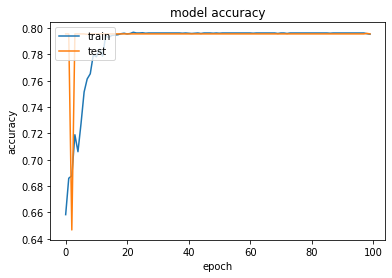

In [74]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

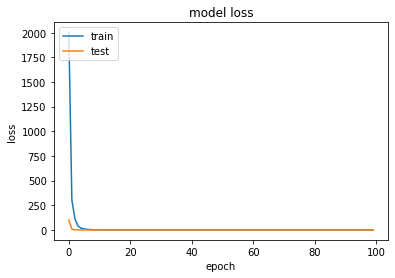

In [75]:
#summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

thankyou